# CNN - 합성곱 신경망(Convolutional Neural Network)

## Overview
- 컴퓨터 비전(이미지, 동영상관련 처리) 에서 사용되는 딥러닝 모델    

### CNN 응용
1.  이미지 분류
    - 64\*64 이미지를 입력하였을 때 고양이인지 여부 판단 
    ![](http://cs231n.github.io/assets/classify.png)
2. Object detection(객체 찾기)
    - 이미지 안의 물체를 탐색하여 자동차에 네모 박스
    - 찾는 항목을 찾아 표시해주는 것. 
    - ex) 자동차 번호판 인식
    <img src="https://camo.githubusercontent.com/57cf362cc6d1ce644282864edf499e8613ca7a7d/687474703a2f2f706a7265646469652e636f6d2f6d656469612f696d6167652f66696e616c2e706e67" width="20%">
3. 이미지를 새로운 스타일로 변환
    - 입력 이미지와 스타일 이미지를 합쳐 새로운 이미지 생성 
    - 이미지 스타일 변경해주는 것. 
    - ex) 사진을 반고흐 그림스타일로 변경 등.
    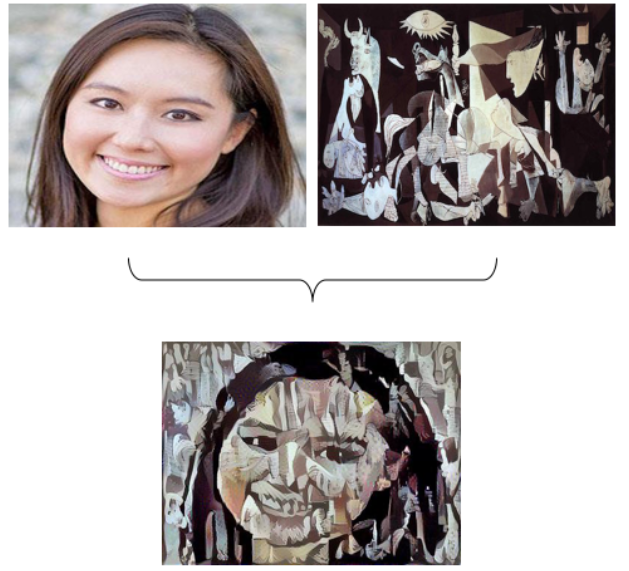

### CNN 구성
- 이미지로 부터 부분적 특성을 추출하는 **Feature Extraction** 부분과 분류를 위한 **Classification 부분**으로 나뉜다.
    - Feature Exctraction : Convolution Layer
    - Classification : Dense Layer (Fully connected layer)
    
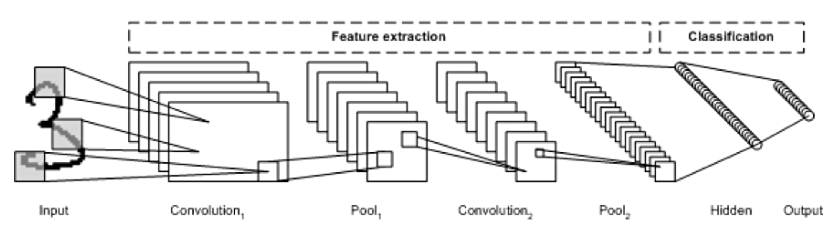

### Dense Layer를 이용한 이미지 처리의 문제점
- 이미지를 input으로 사용하면 dimension(차원)이 매우 큼 
- 64 * 64 픽셀 이미지의 경우
    - 흑백은 Unit(노드)당 64 * 64 = 4096 개 학습 파라미터(가중치-weight)
    - 컬러는 Unit(노드)당 64 * 64 * 3 (RGB 3가지) = 12288 학습 파라미터(가중치-weight)
- Hidden unit의 수에 따라 weight의 수가 지나치게 커지기 때문에 메모리 부족과 많은 계산 필요
- Fully connected layer(dense layer)만을  사용한다면 이미지의 **공간적 구조 학습이 어려움**

## 합성곱 연산  개념
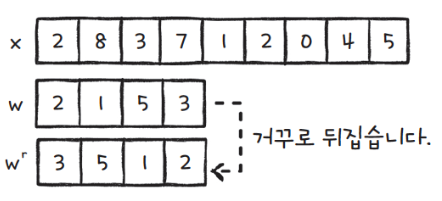

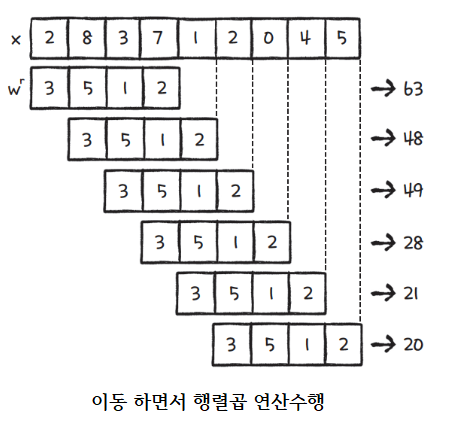

## 이미지와 합성곱
- 필터(커널) : 이미지에서 특성을 추출

- 대상 이미지
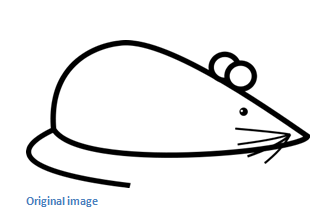

<center>[출처] https://adeshpande3.github.io/</center>

- 필터(커널)
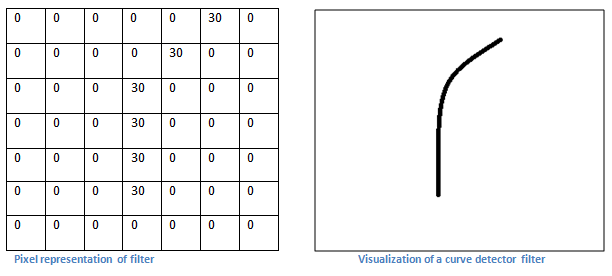

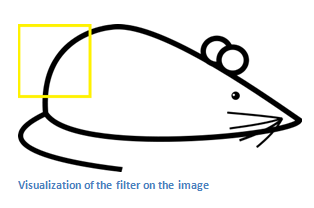

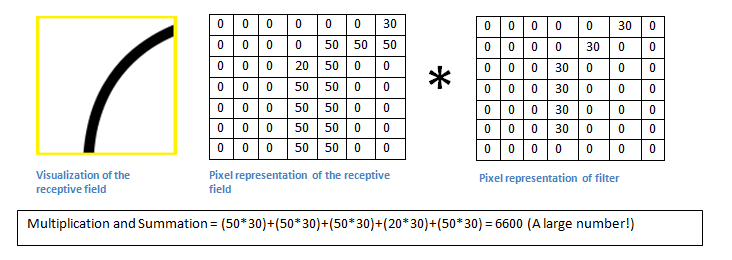

<center><b>필터와 이미지의 노란 박스 부분을 합성곱하면 6600 이 나온다.</b></center>

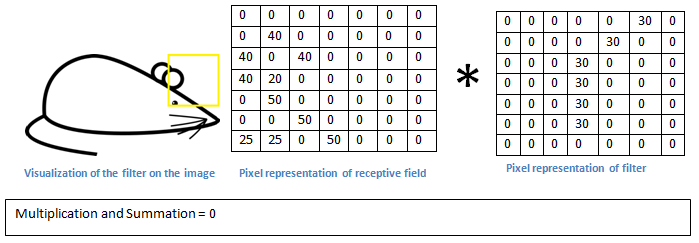

<center><b>필터와 이미지의 노란 박스 부분을 합성곱하면 0 이 나온다.</b></center>

<font size='5' color='red'><b>필터와 부분 이미지의 합성곱 결과가 값이 나온다는 것은 그 부분 이미지에 필터가 표현하는 이미지특성이 존재한다는 것이다.</b></font>

<img src="figures/numerical_no_padding_no_strides.gif" width="50%">

### 검증된 필터 적용의 예

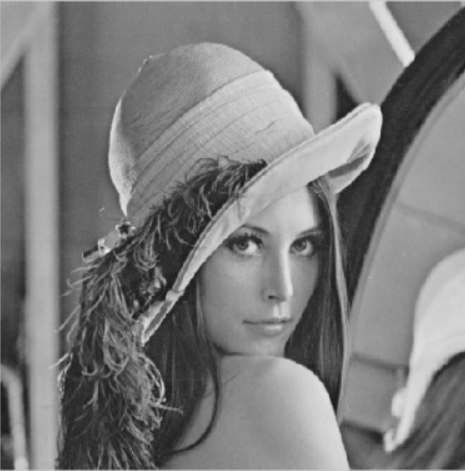

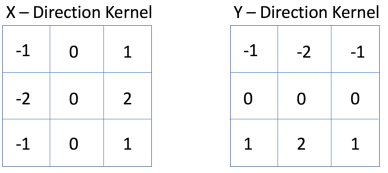

- Sobel 필터
- X-Direction Kernel: 이미지에서 수평 윤곽선(edge)를 찾는다.
- Y-Direction Kernel: 이미지에서 수직 윤곽선(edge)를 찾는다.
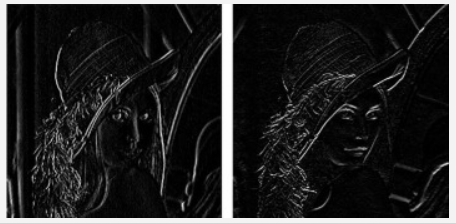
<center>왼쪽: X 적용, 오른쪽: Y 적용</center>

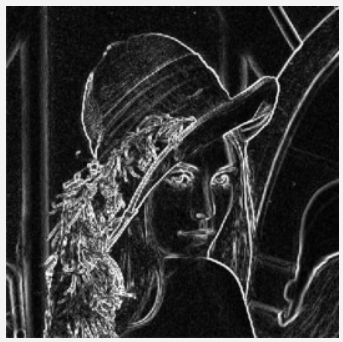
- 둘을 합치면 위와 같이 원본 이미지의 특징 중 윤곽선을 추출할 수 있다.

## CNN에서 Filter
- CNN의 Layer는 이런 Filter(Kernel)들로 구성되 있다.
- CNN은 주어진 Filter(Kernel)를 사용하는 것이 아니라 Filter(Kernel)의 값을 가중치(파라미터로)로 데이터를 학습해 찾아낸다.

### CNN도 레이어를 쌓는다.
- 첫번째 레이어는 부분적 특징을 찾는다.
- 다음 단계에서는 이전 레이어에서 찾아낸 부분적 특징들을 합쳐 점점 추상적 개념을 잡아낸다.
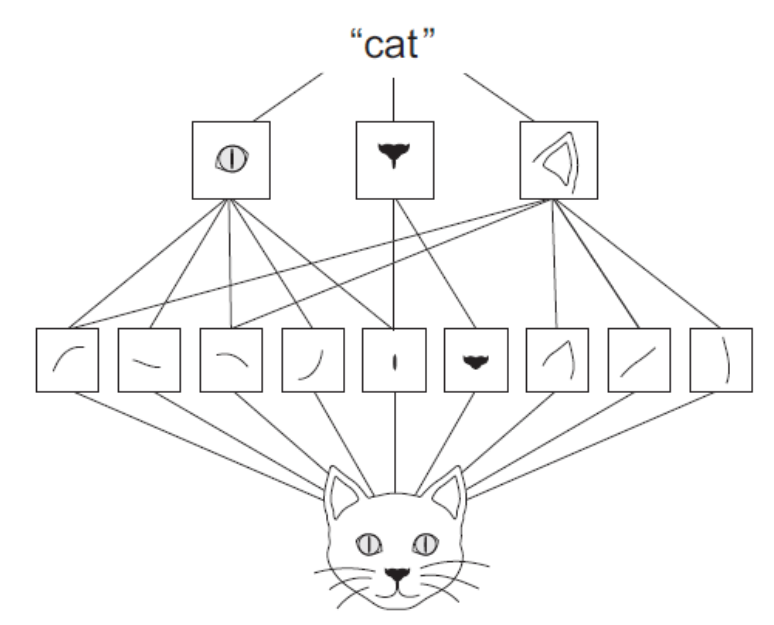

## Convolutional operation의 작동방식 
- hyper parameter 정의
    - Filter의 크기: 일반적으로 3 * 3, 5 * 5 크기의 filter를 주로 사용 (보통 홀수 사이즈로 잡는다.)
    - Filter의 수: Feature map output의 깊이 
        - 사용하는 filter의 개수에 따라 결과물의 수가 결정된다.
> Featuer Map: Filter를 거쳐 나온 결과물

- 흑백 이미지는 하나의 행렬로 구성 즉, channel=1
- 컬러 이미지는 RGB의 각 이미지로 구성되어 3개의 행렬로 구성 channel=3
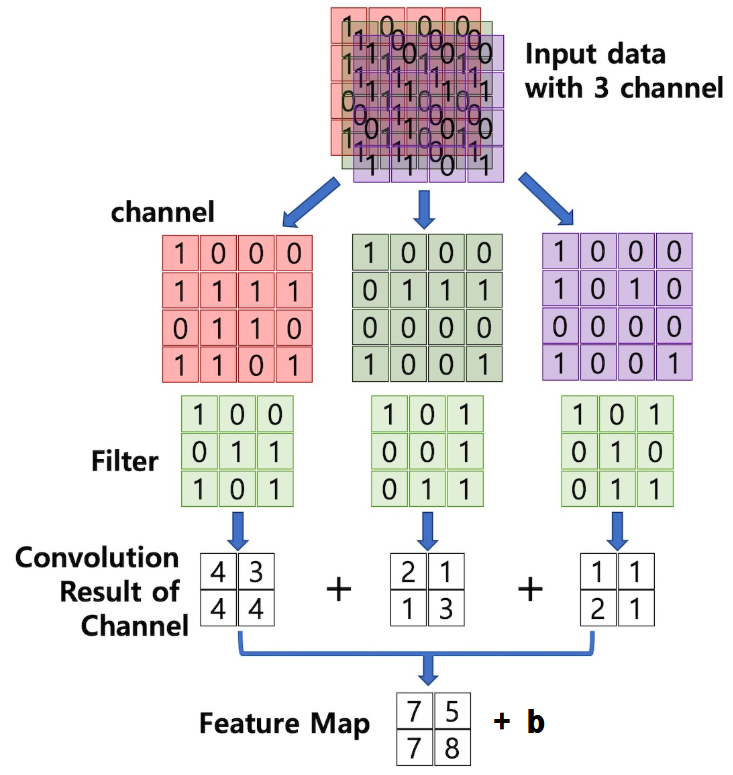

- 예)
    - Input image는  $6 \times 6 \times 3$ 형태 (높이, 너비, 채널)
    - Filter: $3 \times 3 \times 3$ 크기 1개    (높이, 너비, 채널)
    - Output: $4 \times 4$  feature map 1개 생성 
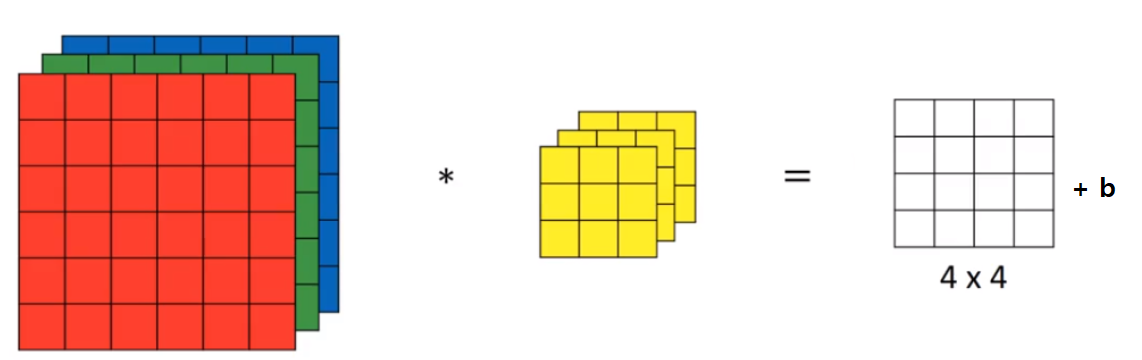

- 예) 
    - Input image는  $6 \times 6 \times 3$ 형태의 volume
    - Filter: $3 \times 3 \times 3$ 크기 2개
    - Output: $4 \times 4 $  feature map 2개 생성 
     
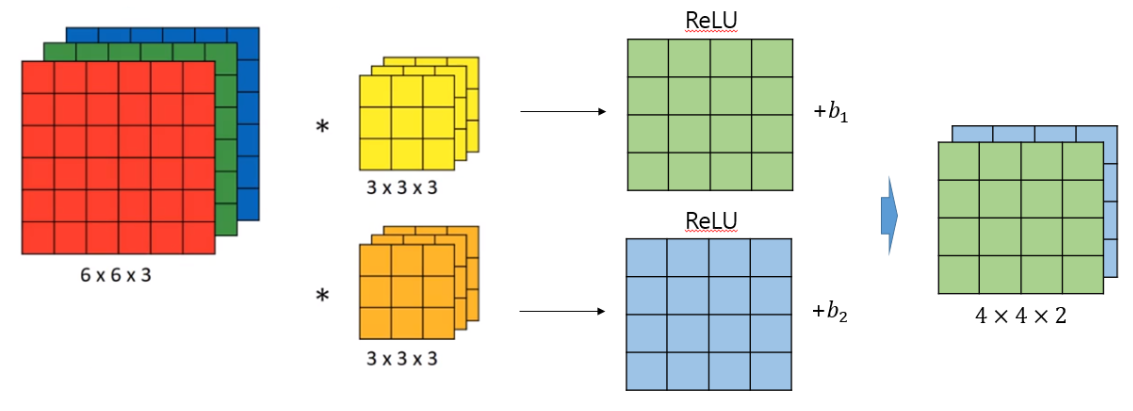

## Padding

- 이미지 가장자리의 픽셀은 convolution 계산에 상대적으로 적게 반영하기때문에
- 이미지 가장자리를 0으로 둘러싸서 가장자리 픽셀에 대한 반영 횟수를 늘림
- "valid" padding
    - Padding을 적용하지 않음 즉, 원본이미지만 사용
- "same" padding (일반적으로 사용빈도가 높음)
    - Input과 output의 이미지 크기가 동일하게 되도록 padding 수를 결정 


<img src="figures/zero_padding.png" width="30%" align="left">
<img src="figures/same_padding_no_strides.gif" width="30%">

## Strides
- Kernel(filter)의 이동을 한 번에 **몇 칸씩 이동하는가** 
- Stride=2: 한 번에 두 칸씩 이동 (feature map의 너비와 높이가 2배수로 다운샘플링 되었음을 의미) 

<img src="figures/no_padding_2_strides.gif" width="30%">

##  Max Pooling Layer(최대풀링) 
#### - 가장 특징(핵심)적인 부분만 추출
- 해당 영역의 input 중 가장 큰 값을 출력 
- 일반적으로 2*2 크기의 window, stride=2 사용 (겹치지 않게 한다.)
- 강제적인 subsampling 효과 
    - weight 수를 줄여 계산속도를 높임, 메모리를 적게 사용
    - 특징의 공간적 계층구조를 학습한다. => 부분적 특징을 묶어 전체적인 특징의 정보를 표현하게 된다.
- 학습할 weight가 없음: 일반적으로 convolutional layer+pooling layer를 하나의 레이어로 취급 

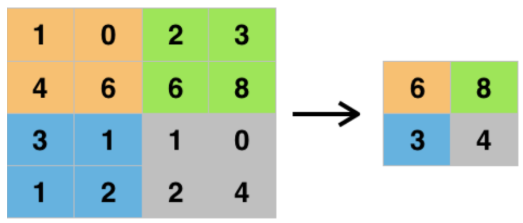
<center> Max pooling layer(2 × 2 pooling kernel, stride 2, no padding) <center>
    

##  Example of CNN architecture

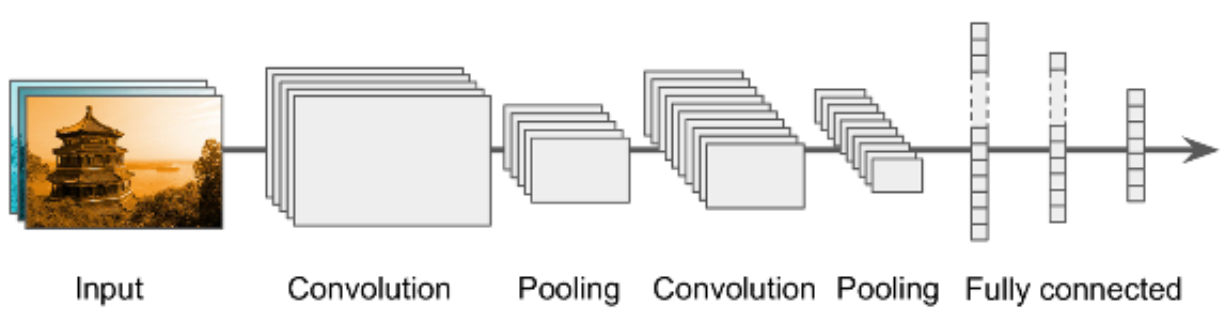

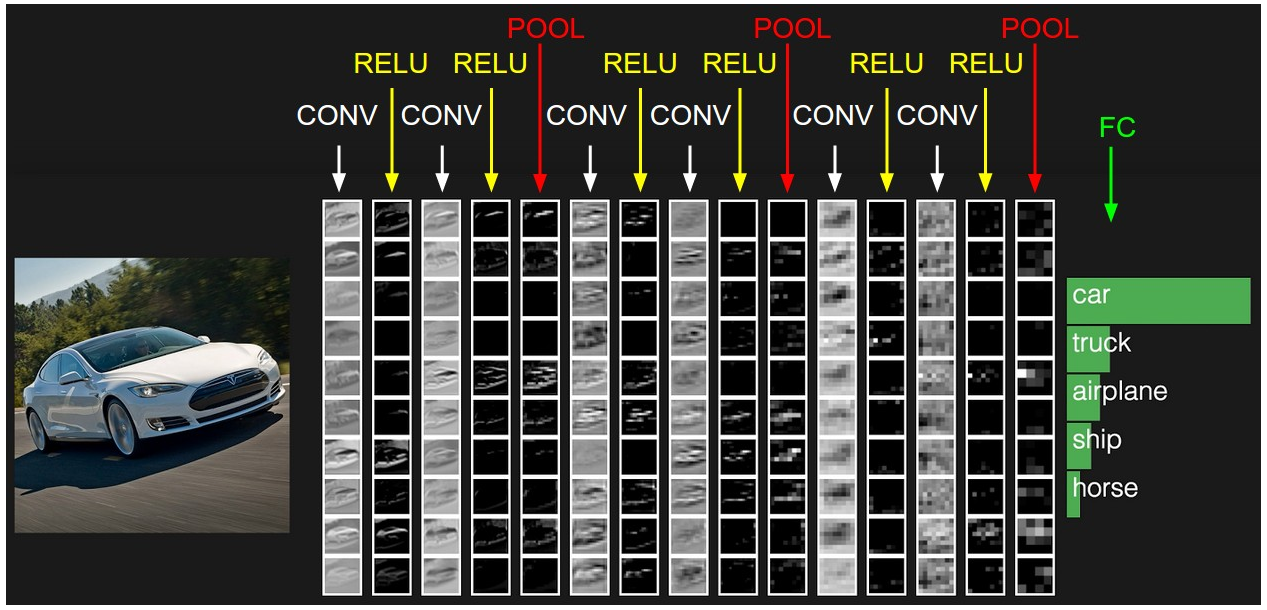

- 일반적으로 convolutional layer (+ ReLU or other activations) + pooling layer를 여러 개 쌓음 
- Network가 진행될 수록 feature map의 크기는 줄어들고 깊이는 증가
- 마지막에 Fully connected layer(+ ReLU or other activations) 추가 
- Output 형태에 맞는 output layer 

## 4.4 CNN structure with Keras

- Input_shape: (image개수, image_height(행), image_width(열), image_channels(채널수)) - input layer에서 적용

- 합성곱 레이어: tensorflow.keras.layers.**Conv2D**(filters, kernel_size, strides=(1, 1), padding='valid', activation=None) 
    - `filters`:  the dimensionality of the output space (i.e. the number of output filters)
    - `kernel_size`:  height and width of the 2D convolution window
    - `strides`: the strides of the convolution along the height and width
    - `padding`: "valid": padding(X), 원본이미지로 or "same": 동일한 크기로
    - `activation`: activation function https://keras.io/activations/ - 보통 'relu'함수 사용
- MaxPooling 레이어: tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')
    - `pool_size`: Pooling window size - N`*`N 에서 가장 큰 값 추출
    - `strides`: default = `pool_size`
- tensorflow.keras.layers.Flatten()
    - Flattens the input
    - Fully connected layer를 적용하기 위함
    - Flatten: 2차원의 이미지를 1차원으로 변환 즉, reshape